<a href="https://colab.research.google.com/github/MijulSaxena/EDA-project-on-Gooogle-playstore./blob/main/Play_Store_App_Review_Analysis_Capstone_Project_by_Mijul_Saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# importing numpy, pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extract the data of google playstore

In [ ]:
# Reading in the Play Store data and User Reviews data from CSV files
play_store_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
# Play Store Dataset First Look
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# User Reviews Dataset First Look
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# Checking random data 
play_store_data.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7882,TUTORIAL CT SCAN CARDIAC,MEDICAL,NaN,1,15M,"1,000+",Free,0,Everyone,Medical,"March 10, 2018",2.0,4.0.3 and up
4844,ZArchiver Donate,TOOLS,4.8,1721,Varies with device,"10,000+",Paid,$2.50,Everyone,Tools,"February 16, 2018",Varies with device,Varies with device
8735,Whataburger,FOOD_AND_DRINK,4.5,5093,56M,"500,000+",Free,0,Everyone,Food & Drink,"April 10, 2018",1.9.0,4.2 and up
5736,A&W Restaurants,FOOD_AND_DRINK,1.7,14,13M,"1,000+",Free,0,Everyone,Food & Drink,"June 6, 2018",2.7.0,4.1 and up
2249,MommyMeds,MEDICAL,3.2,45,21M,"5,000+",Paid,$3.99,Everyone,Medical,"November 15, 2017",2.0.1,6.0 and up
9553,El Laberinto del Demonio 2,FAMILY,4.1,3654,25M,"100,000+",Free,0,Teen,Puzzle,"April 14, 2017",1.0.1,4.0 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
6012,BD Online News,NEWS_AND_MAGAZINES,4.6,30,3.8M,"1,000+",Free,0,Everyone,News & Magazines,"March 20, 2018",1.5,4.0.3 and up
10631,ORLANDO FLORIDA MAP,TRAVEL_AND_LOCAL,NaN,3,9.2M,"1,000+",Free,0,Everyone,Travel & Local,"January 24, 2017",1.3.0,4.0 and up
4686,Vigo Video,VIDEO_PLAYERS,4.3,1615418,Varies with device,"50,000,000+",Free,0,Teen,Video Players & Editors,"August 3, 2018",Varies with device,4.0.3 and up


##**Data Cleaning and Preperation of dataset**

In [ ]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##Cleaning App Column



In [ ]:
# Checking duplicates in app column 
play_store_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
# Removing the duplicate items
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [ ]:
# Checking Shape
play_store_data.shape

(9660, 13)

##I observed that some columns are not that relevant also not responsible for app engagement and success like last updated date, current version, android version and Reviews:

In [ ]:
# we can drop all those irrelevent data
play_store_data.drop(['Last Updated',	'Current Ver',	'Android Ver', 'Reviews'], axis = 1, inplace = True)

In [ ]:
play_store_data.shape

(9660, 9)

## I have successfully removed the irrelevant data. Now, dealing with null values.

In [ ]:
# Checking for null values in play store data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1463
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

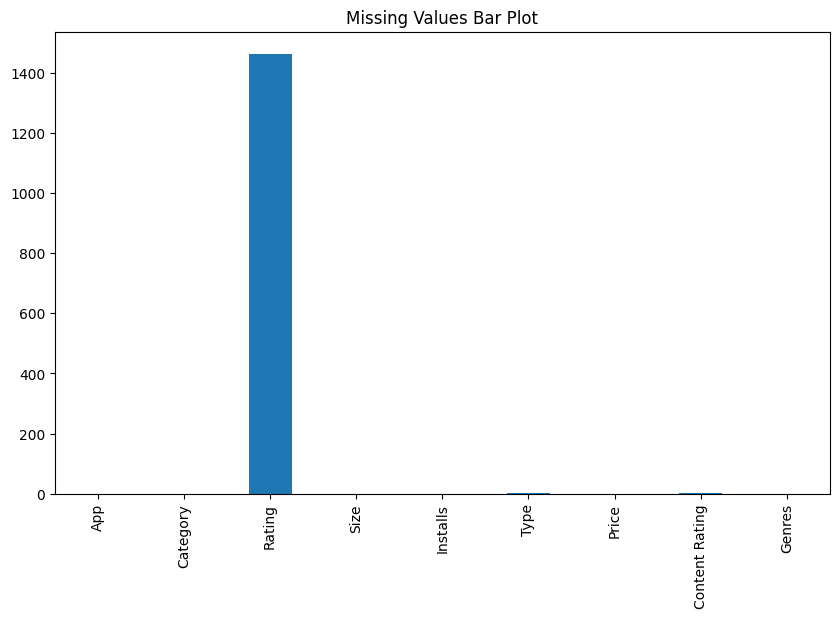

In [ ]:
# Creating a bar plot of missing values percentage using pandas and matplotlib
plt.figure(figsize=(10,6))
play_store_data.isnull().sum().plot(kind='bar')
plt.title("Missing Values Bar Plot")
plt.show()

In [ ]:
# Since there is only one missing value in Content Rating and Type column. According to my observation it is best to drop them :
play_store_data.dropna(subset = ['Content Rating', 'Type'], inplace=True)

There are lot of missig values in Rating Column.

<Axes: >

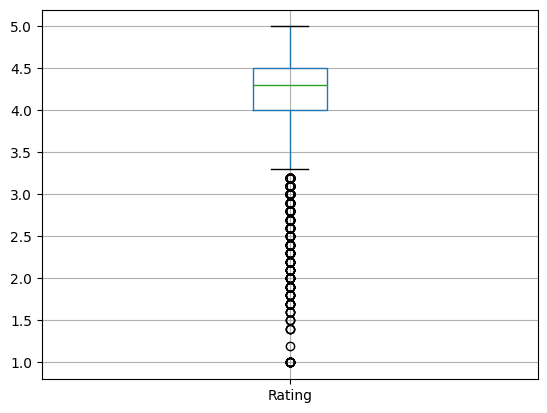

In [ ]:
# Visualizing the missing values of Rating column using boxplot
play_store_data.boxplot()

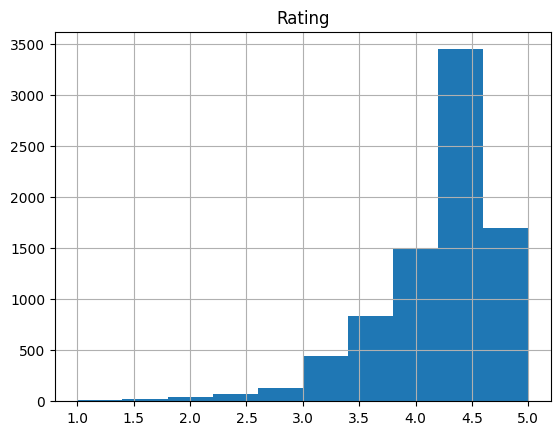

In [ ]:
# Visualizing the missing values of Rating column using histogram
play_store_data.hist();

We can see Rating column has so many outliers and missing values. So, we can't drop all the null values. Instead we can fill all the null values with either mode or median. 

In [ ]:
# Rating column filling the null values with mode in rating column
mode_of_ratings = play_store_data['Rating'].mode()
play_store_data['Rating'].fillna(play_store_data['Rating'].mode()[0], inplace = True)

In [ ]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


##There is no null value left. Now, move to others

In [ ]:
play_store_data.shape

(9658, 9)

In [ ]:
play_store_data.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
# Play Store Dataset Info 
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Size            9658 non-null   object 
 4   Installs        9658 non-null   object 
 5   Type            9658 non-null   object 
 6   Price           9658 non-null   object 
 7   Content Rating  9658 non-null   object 
 8   Genres          9658 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.5+ KB


#### **We can see from the above statement that columns like size, installs and price has object datatype instead of any numeric datatype. So, let's convert them into numeric datatype.**

Installs Column

In [ ]:
# Removing the ',' and '+' symbol from installs column
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.strip('+'))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.replace(',', ''))

In [ ]:
# Converting the Installs column from object type to integer type
play_store_data['Installs'] = play_store_data['Installs'].astype(int)

In [ ]:
play_store_data.tail(10)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,9.8M,5000,Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.8,582k,100000,Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,619k,1000,Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,2.6M,500,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,4.3,9.6M,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,53M,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6M,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,9.5M,1000,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Varies with device,1000,Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,19M,10000000,Free,0,Everyone,Lifestyle


Size Column




In [ ]:
# Cleaning Size Column
# Replacing 'Varies with device' with 'NaN'
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

# Removing 'M' from the string and converting to float
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x))

# Converting 'k' to 'M' and convert to float
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

Price Column

In [ ]:
# Cleaning Price Column
# Removing the dollar sign
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.strip('$'))

# Converting the Price column to float data type
play_store_data['Price'] = play_store_data['Price'].astype(float)

##**Exploratory Analysis and Visualization**

<ipython-input-28-768a8d84daf1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(play_store_data['Rating'], shade=True);


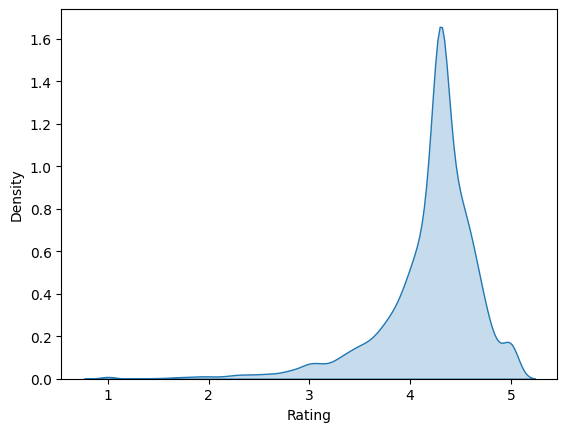

In [ ]:
# Creating a kernel density estimate plot of the Rating column
sns.kdeplot(play_store_data['Rating'], shade=True);

Some insights that can be gathered from this plot are:



*   The majority of apps have a rating between 4 and 4.8.
*   The density of the distribution decreases as the rating value moves away from the peak, indicating that there are fewer apps with lower or higher ratings.

*   There is a slight skewness towards higher ratings, indicating that there are more apps with higher ratings than lower ratings.



In [ ]:
play_store_data.describe()

,Rating,Size,Installs,Price
count,9658.000000,8432.000000,9.658000e+03,9658.000000
mean,4.192431,37.133693,7.778312e+06,1.099413
std,0.496422,102.415039,5.376100e+07,16.853021
min,1.000000,1.000000,0.000000e+00,0.000000
25%,4.000000,5.300000,1.000000e+03,0.000000
50%,4.300000,14.000000,1.000000e+05,0.000000
75%,4.500000,32.000000,1.000000e+06,0.000000
max,5.000000,1020.000000,1.000000e+09,400.000000


<ipython-input-30-db096f76b7a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(play_store_data.corr(), annot = True);


Text(0.5, 1.0, 'Correlation between colums')

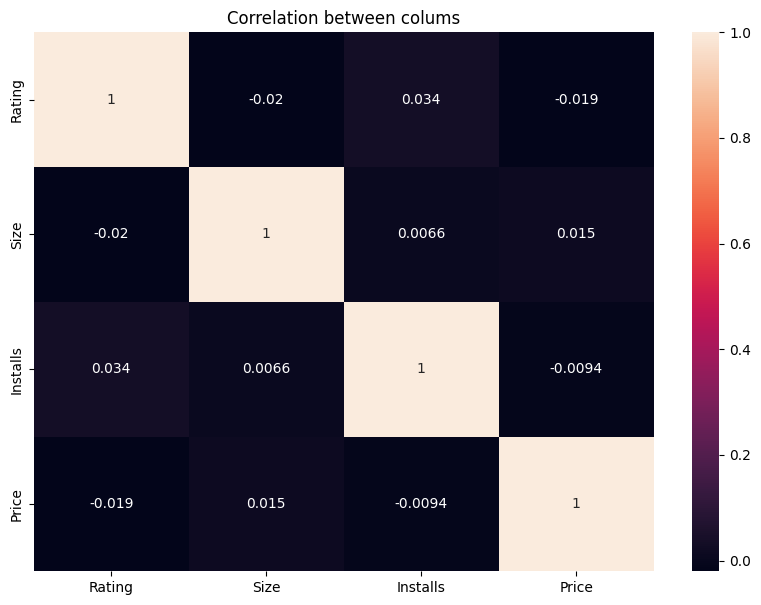

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (10,7))
sns.heatmap(play_store_data.corr(), annot = True);
plt.title('Correlation between colums')

Here are some possible conclusions that can be drawn from analyzing the relationship between these columns:

*   There is positive correlation between Rating and Installs, which 
means that higher ratings might lead to more installs, and vice versa. 
*   There is a negative correlation between the "Price" and "Installs" columns, it suggests that higher-priced apps tend to have lower download numbers.

*   There is a egative correlation between the Price and Rating columns, which indicates that higher-priced apps tend to have slightly lower ratings.
*   We can observe that the Price column has strong positive correlation with the Size.











<BarContainer object of 33 artists>

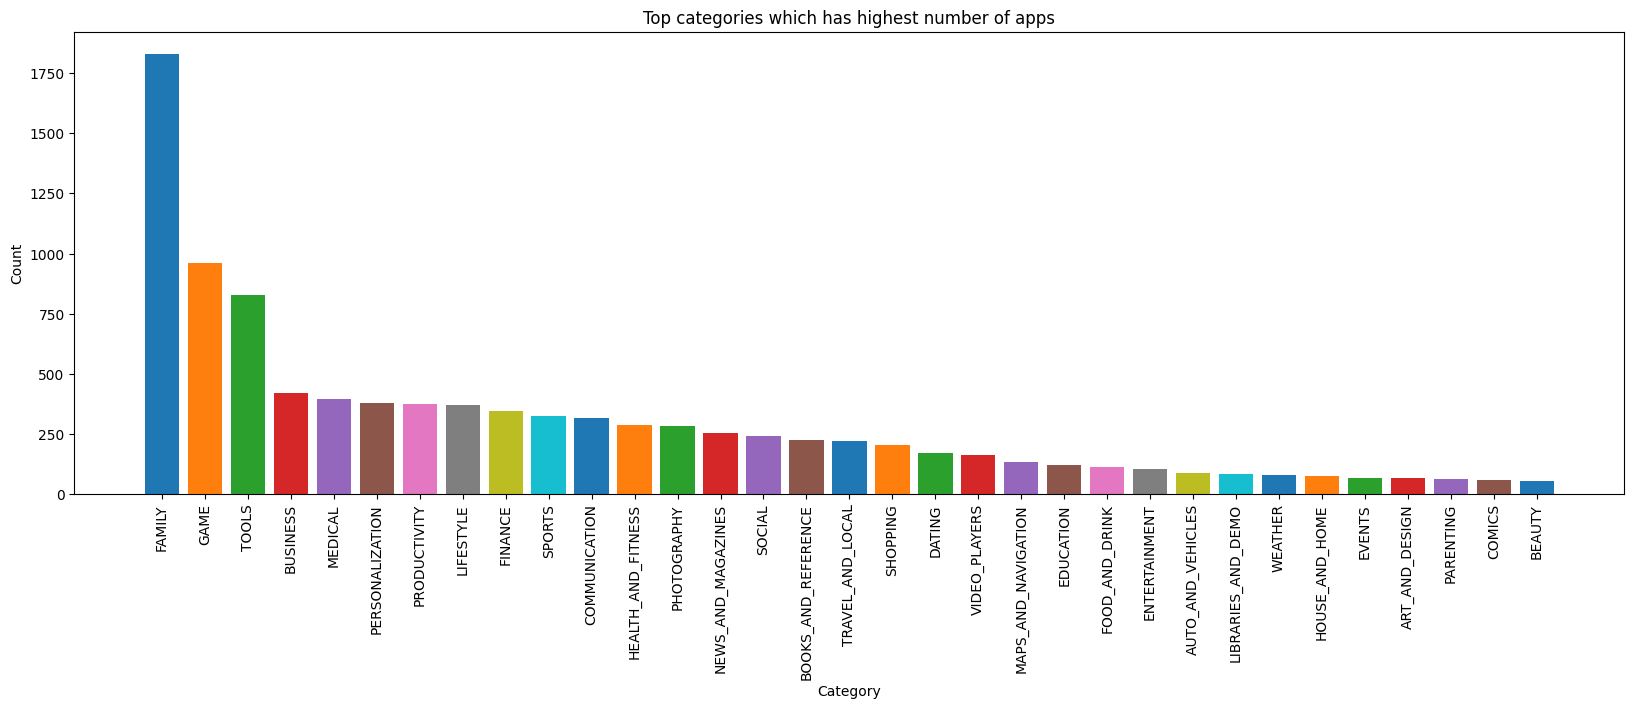

In [ ]:
# Number of apps for each category
plt.figure(figsize=(20,6)) 
plt.xlabel("Category")
plt.ylabel("Count")
plt.title('Top categories which has highest number of apps')
plt.xticks(rotation=90)

# Getting value counts for Category and their corresponding labels
y = play_store_data['Category'].value_counts()
x =  play_store_data['Category'].value_counts().index

# Defining a list of colors to use for each bar
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']

# Creating the bar chart, with a different color for each bar
plt.bar(x,y, color = colors)

In [ ]:
print(y)

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


We can see that family, games and tools categories has the highest number of apps in google play store. So, according to me demand of those category apps must be high. 

Let's just check the number of installs in each category.

In [ ]:
# total number of installs in each category
categories = play_store_data.groupby('Category')
category_total_installs = play_store_data.groupby('Category')[['Installs']].sum().reset_index()

<Axes: title={'center': 'Number of Installs In Each Category'}, xlabel='Category', ylabel='Installs'>

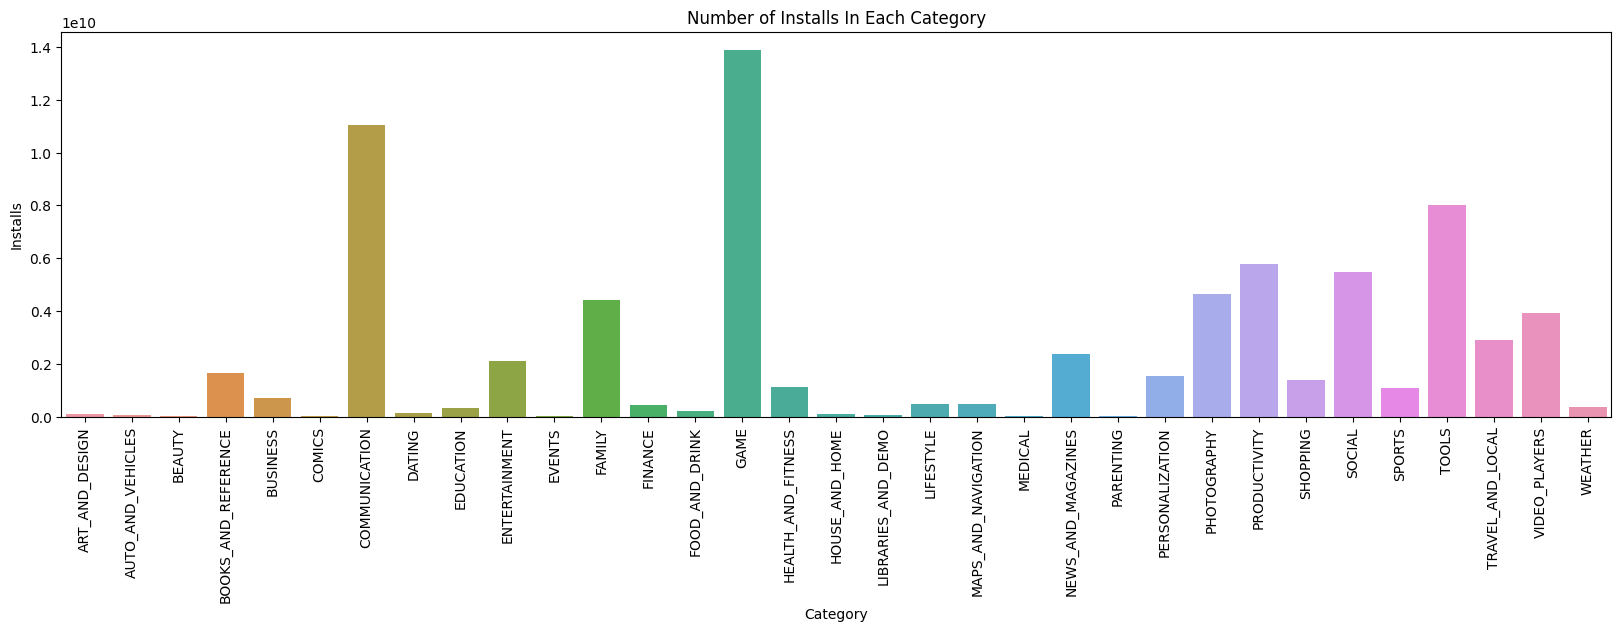

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Number of Installs In Each Category')
sns.barplot(x='Category', y='Installs', data = category_total_installs)

I thought family category has highest number of downloads cause it has highest number of apps available in play store but here games has highest number of downloads. On the other hand, i can see that gaming and tools category apps has hishest number of apps available as well as highest number of intalls. After checking the number of installs in each category, I can say that are more intrested in gaming apps.

---



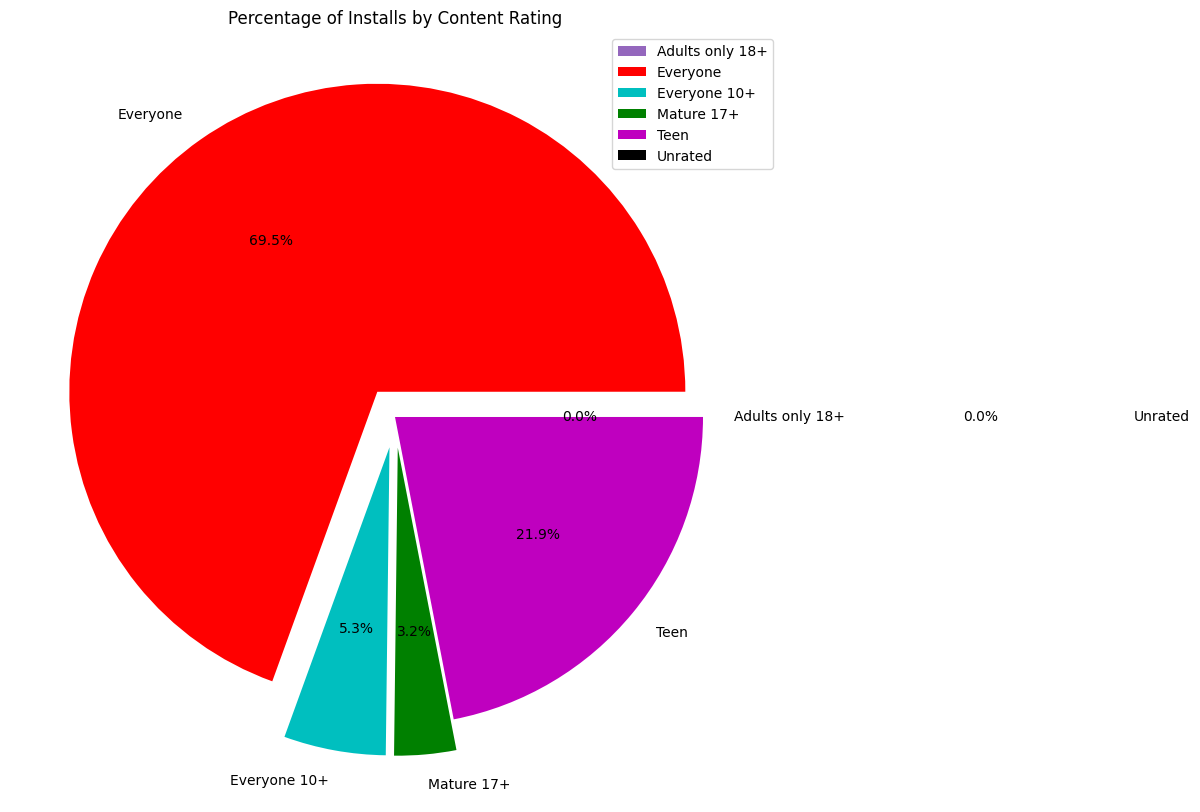

In [ ]:
# Grouping the data by Content Rating and sum up the installs
install_counts = play_store_data.groupby('Content Rating')['Installs'].sum()

# Calculating percentage of installs for each group
total_installs = play_store_data['Installs'].sum()
install_percents = (install_counts / total_installs) * 100

# Creating a pie chart
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(install_percents, labels=install_percents.index, colors = colors, autopct="%.1f%%", explode = explode, textprops ={'fontsize': 10})

# Add title
plt.title("Percentage of Installs by Content Rating")

# Show plot
plt.legend()

We can see that most of the Installs on Playstore come from the apps that can be used by Everyone.



In [ ]:
# the count of applications in each category by their type
app_count = play_store_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

<ipython-input-37-0875c0ff96b4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


Text(0.5, 1.0, 'Count of applications in each category by their type')

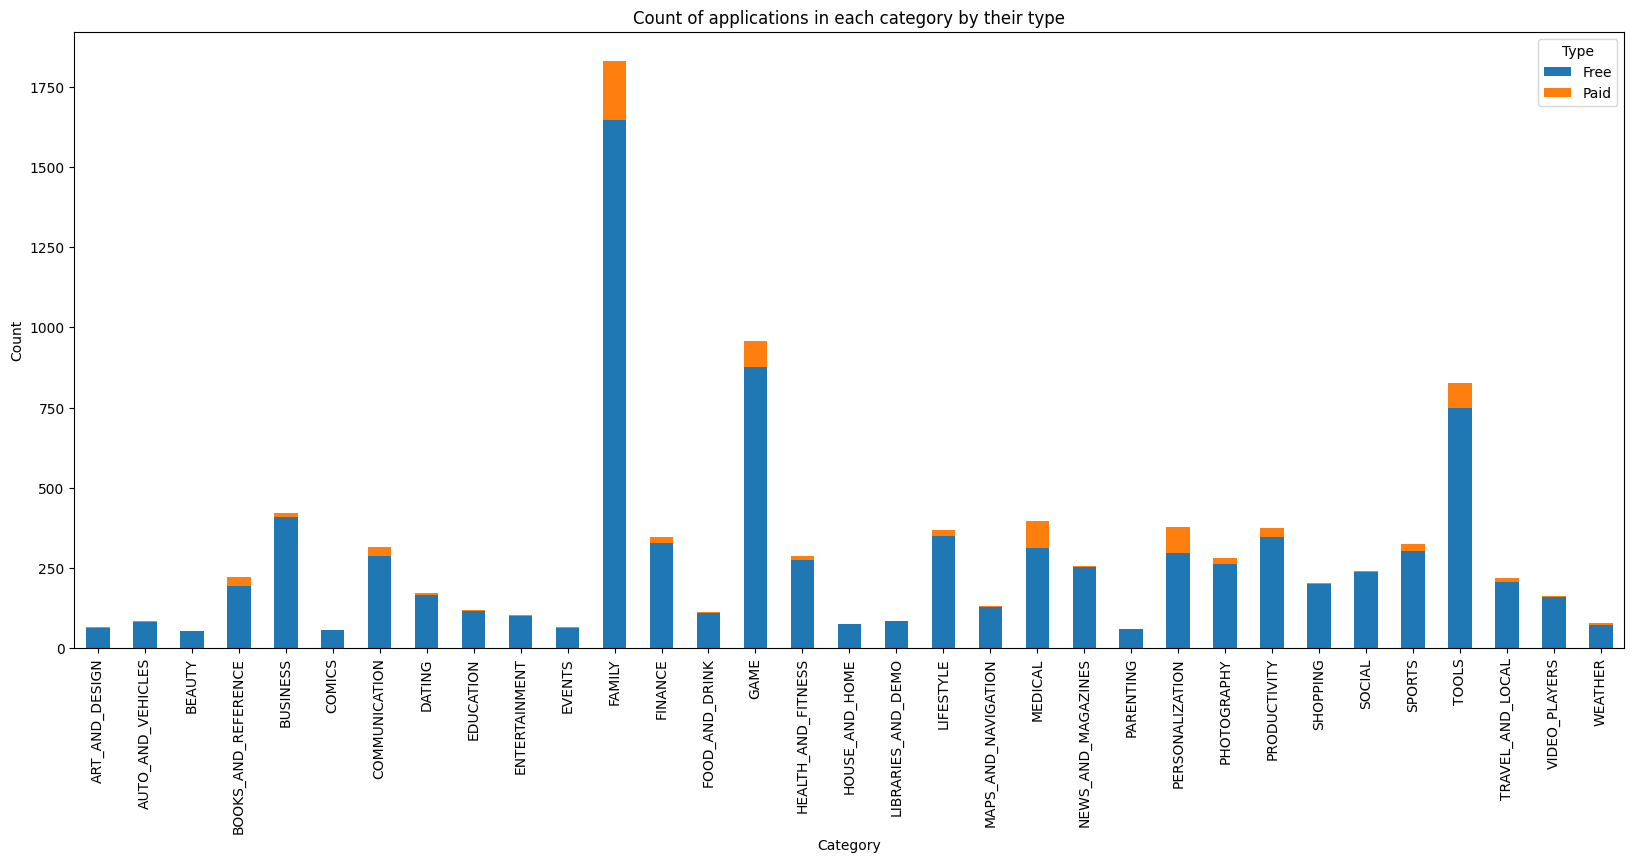

In [ ]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(20,8))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of applications in each category by their type")

Text(0.5, 1.0, 'Free v/s Paid apps present in app store')

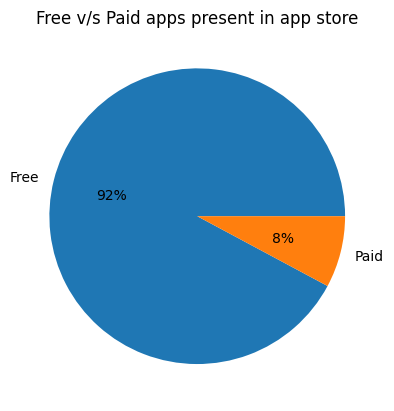

In [ ]:
# Free v/s paid apps
labels = play_store_data['Type'].value_counts(sort = True).index
sizes = play_store_data['Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,  autopct='%1.0f%%')
plt.title('Free v/s Paid apps present in app store')

We can see paid apps are very less as compared with free.

<BarContainer object of 80 artists>

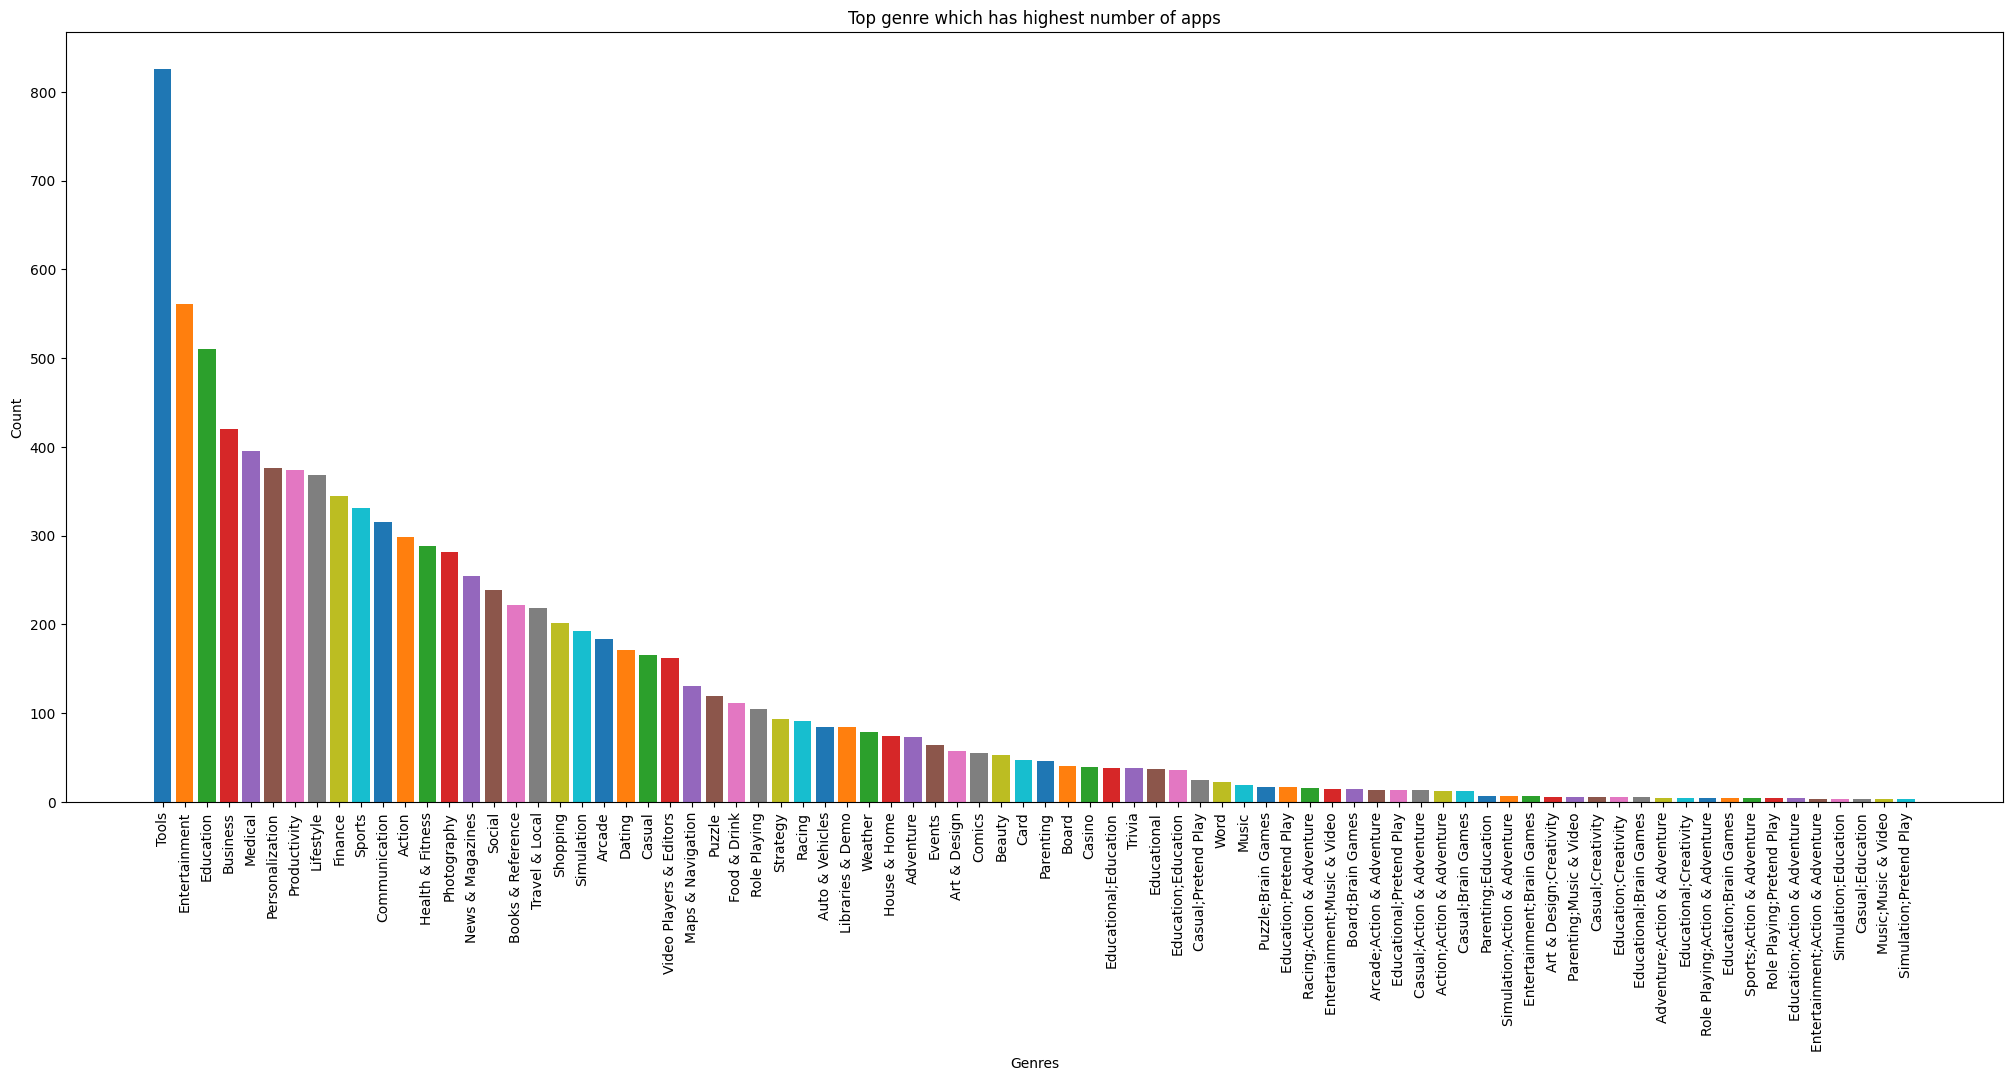

In [ ]:
plt.figure(figsize=(25,10)) 
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title('Top genre which has highest number of apps')
plt.xticks(rotation=90)

# Get value counts for genres and their corresponding labels
y = play_store_data['Genres'].value_counts().head(80)
x = y.index

# Define a list of colors to use for each bar
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29']

# Create the bar chart, with a different color for each bar
plt.bar(x, y, color=colors)


Tools, Entertainment and eduction are top three genres in google play store, cause it has highest number of apps in this genre.

In [ ]:
play_store_data.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


<ipython-input-42-9fb45222932c>:4: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=play_store_data['Size'], y=play_store_data['Rating'], hue=play_store_data['Content Rating'], palette=custom_palette, s=50)


<Axes: xlabel='Size', ylabel='Rating'>

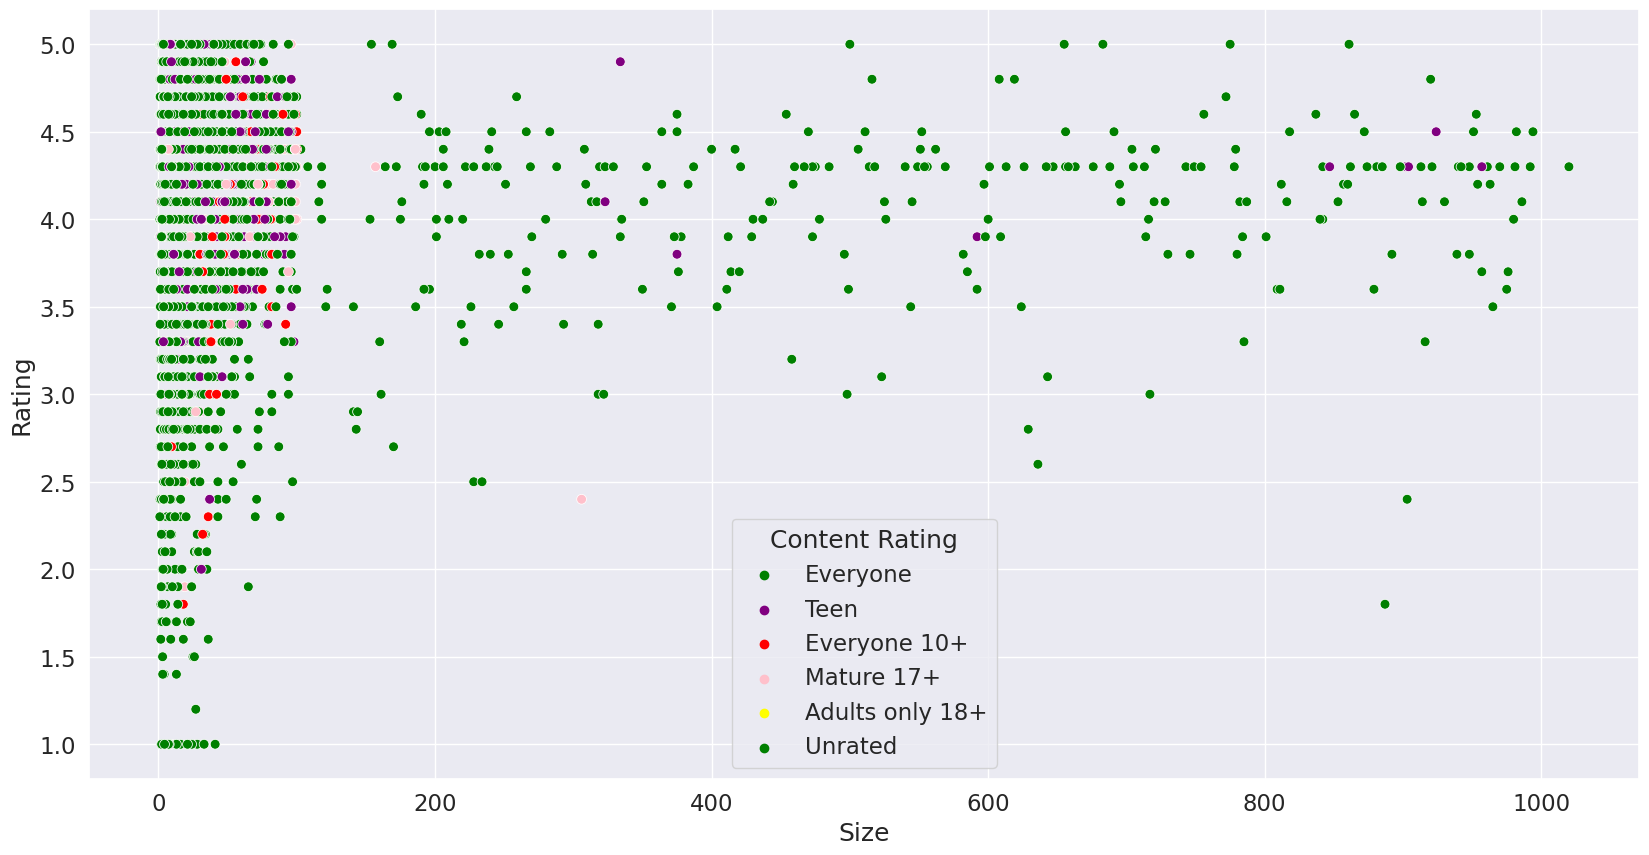

In [ ]:
plt.figure(figsize=(20, 10))
custom_palette = ["green", "purple", "red", "pink", "yellow"]
sns.set(font_scale=1.5)
sns.scatterplot(x=play_store_data['Size'], y=play_store_data['Rating'], hue=play_store_data['Content Rating'], palette=custom_palette, s=50)


From this scatter plot, we can imply that majority apps that are available for everyone are small in size and have high rating.

<Axes: xlabel='Size', ylabel='Rating'>

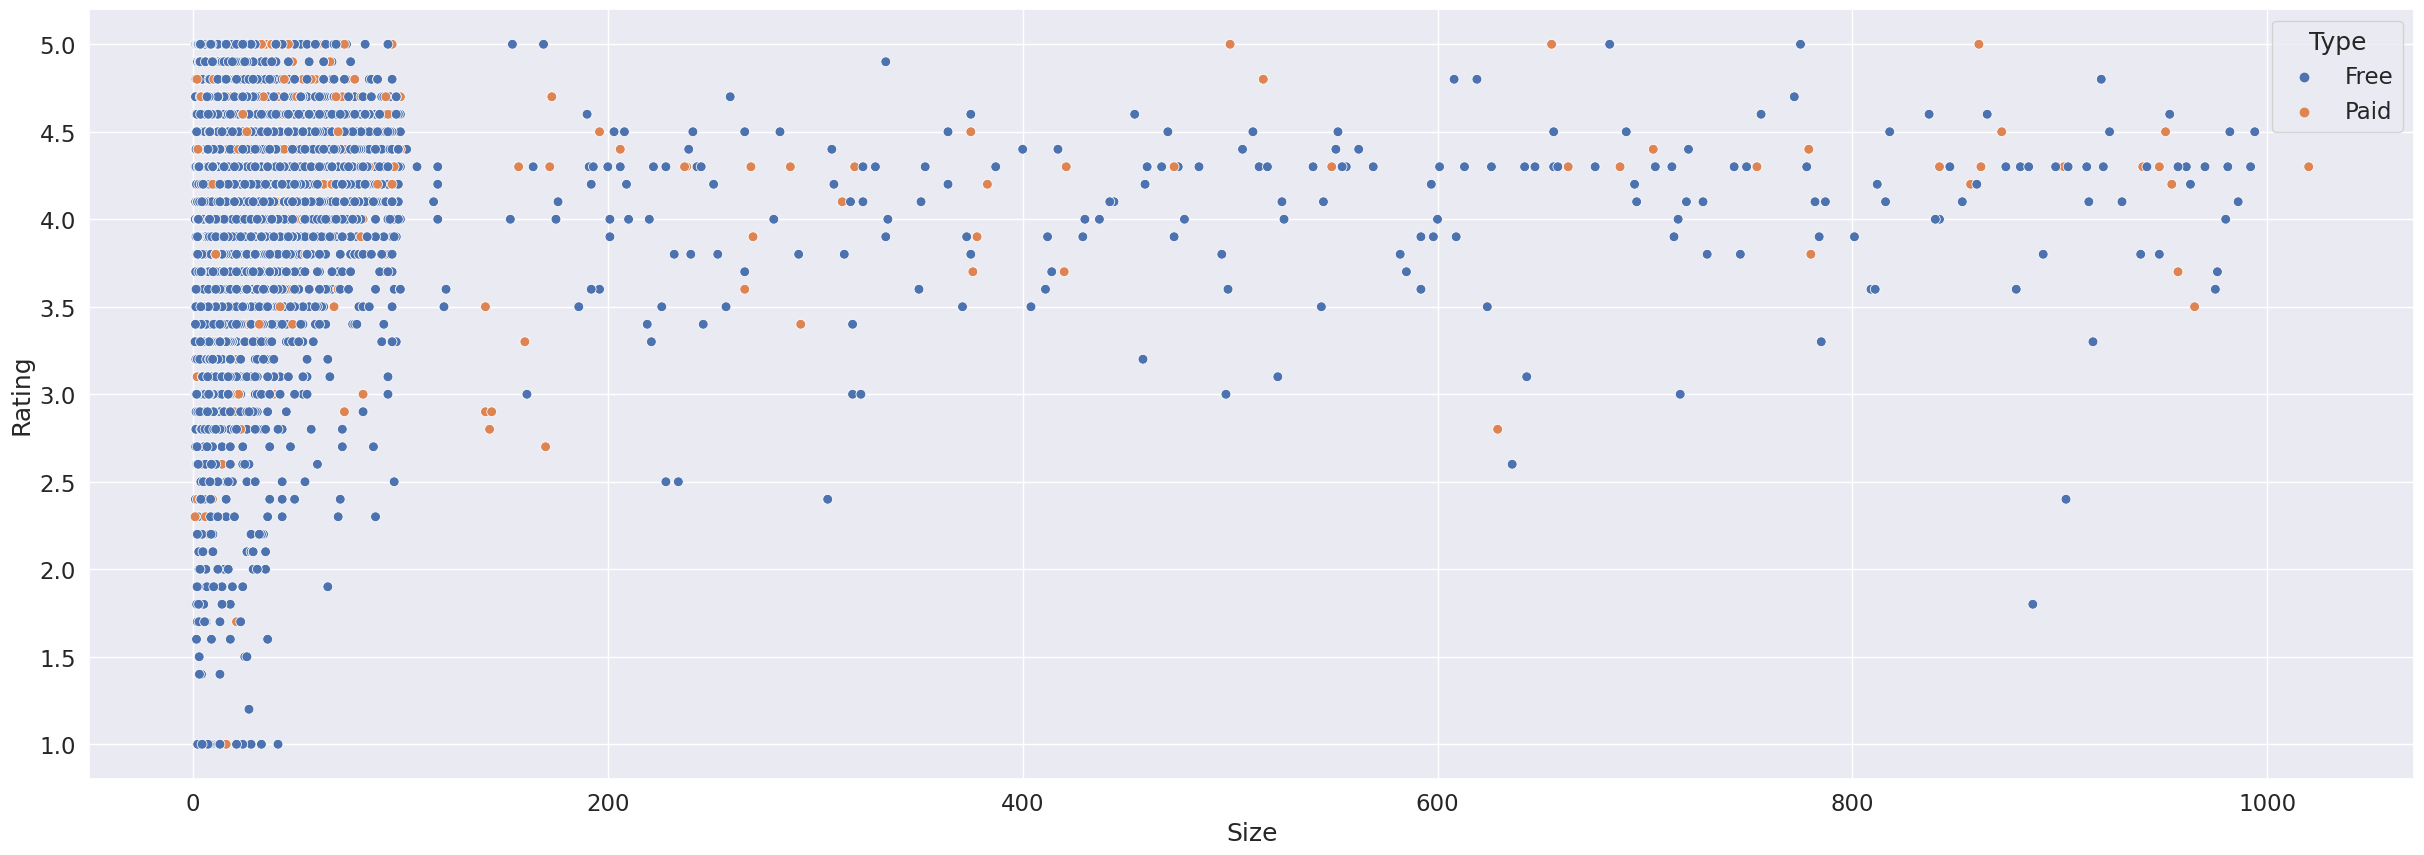

In [ ]:
plt.figure(figsize=(30, 10))
sns.scatterplot(x = play_store_data['Size'], y = play_store_data['Rating'], hue=play_store_data['Type'], s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

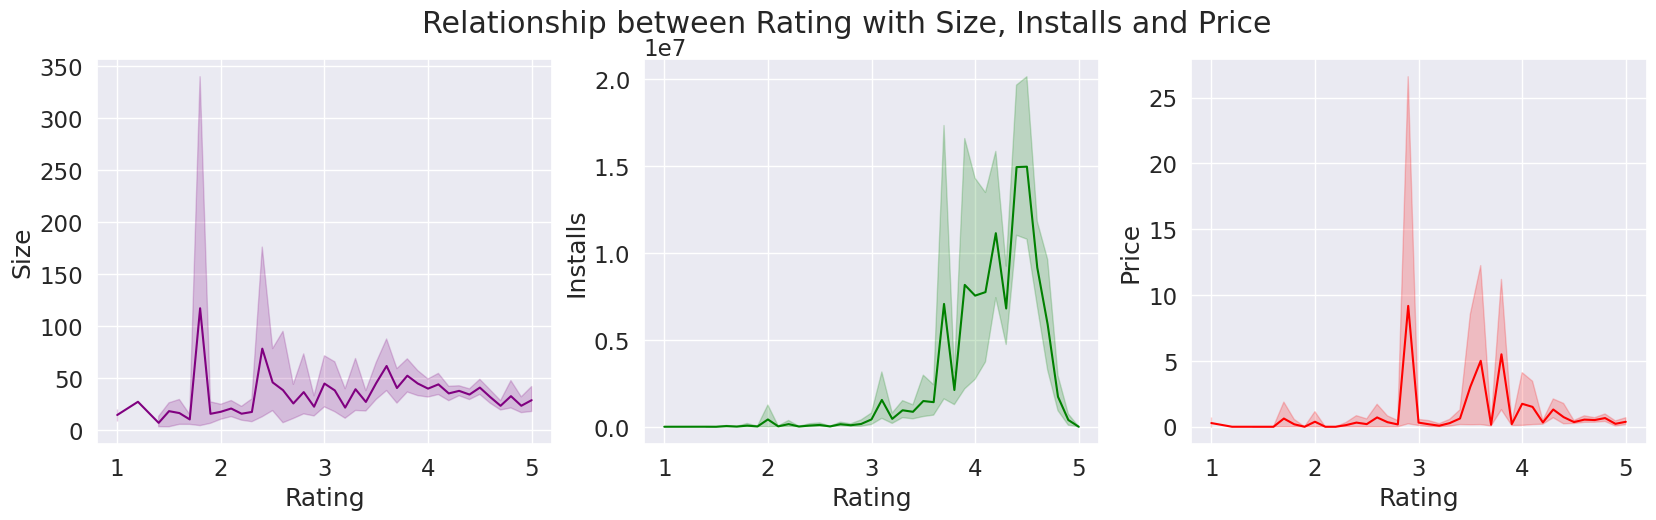

In [ ]:
# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Create line plot for Size column
sns.lineplot(data=play_store_data, x="Rating", y="Size", color='purple', ax=axs[0])
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Size")

# Create line plot for Installs column
sns.lineplot(data=play_store_data, x="Rating", y="Installs", color='green', ax=axs[1])
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Installs")

# Create line plot for Price column 
sns.lineplot(data=play_store_data, x="Rating", y="Price", color='red', ax=axs[2])
axs[2].set_xlabel("Rating")
axs[2].set_ylabel("Price")

# Add title for the whole plot
fig.suptitle("Relationship between Rating with Size, Installs and Price")

# Show the plot
plt.show()


I can see that from rating 3 to 5, there are highest number of installs.



In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'Review Sentiments')

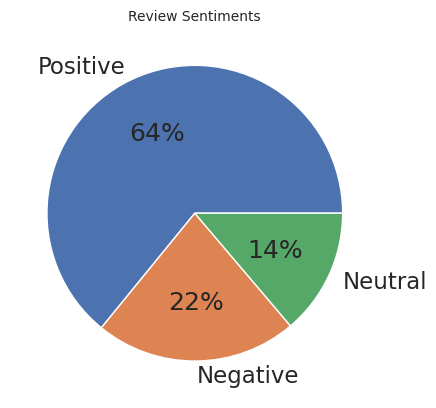

In [ ]:
labels = user_reviews['Sentiment'].value_counts(sort =  True).index
sizes = user_reviews['Sentiment'].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.title('Review Sentiments', fontsize = 10)

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Merging two dataframe 
merged_df = pd.merge(play_store_data, user_reviews, on='App')

In [ ]:
merged_df.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love colors inspyering,Positive,0.500,0.600000


In [ ]:
merged_df.describe()

,Rating,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,61556.000000,41150.000000,6.155600e+04,61556.000000,35934.000000,35934.000000
mean,4.296463,32.705043,4.552088e+07,0.149478,0.180879,0.493698
std,0.310503,51.644205,1.527484e+08,1.676713,0.350062,0.258100
min,2.500000,1.200000,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.200000,9.200000,1.000000e+06,0.000000,0.000000,0.361111
50%,4.300000,21.000000,5.000000e+06,0.000000,0.150000,0.514835
75%,4.500000,46.000000,1.000000e+07,0.000000,0.400000,0.650000
max,4.900000,853.000000,1.000000e+09,33.990000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation between colums of play store data and user reviews')

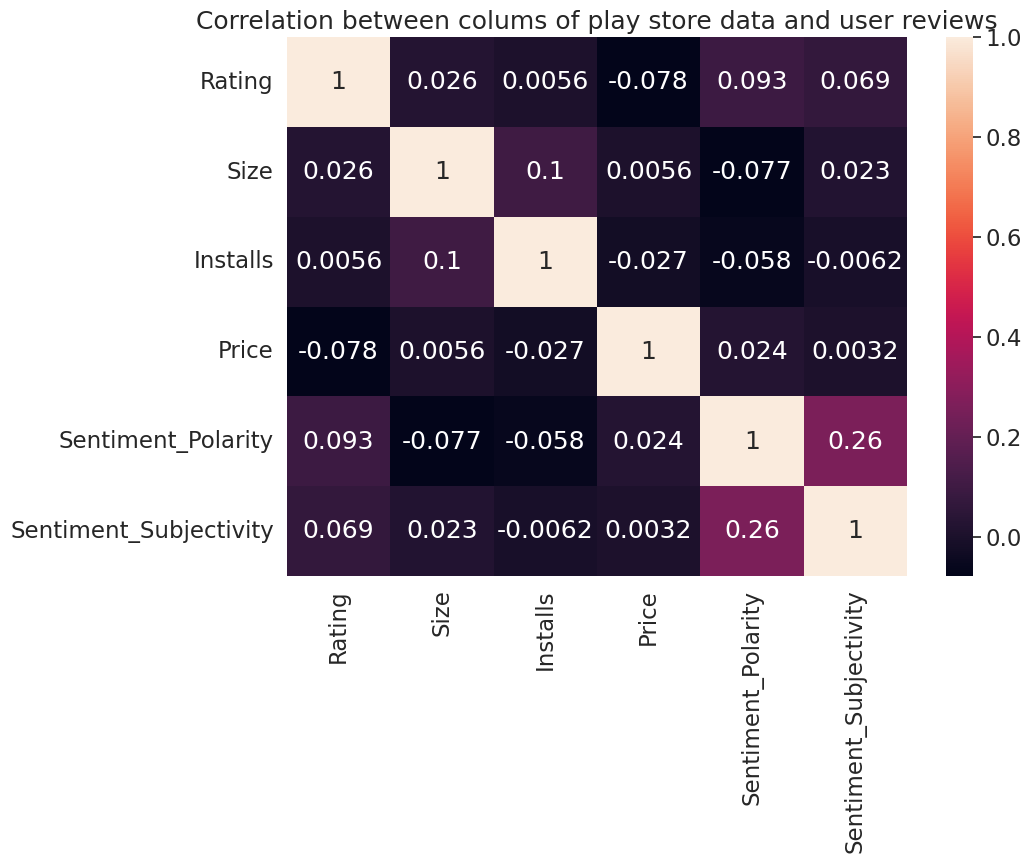

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(merged_df.corr(numeric_only=True),  annot = True)
plt.title('Correlation between colums of play store data and user reviews') 

Sentiment polarity shows a very weak positive correlation with sentiment subjectivity, indicating that as the polarity of sentiment (positive or negative) increases, there is a slight tendency for subjectivity (the degree of personal opinion) to also increase. However, this relationship is not very strong.

Interestingly, sentiment polarity demonstrates a strong positive correlation with rating and price. This suggests that as the sentiment polarity becomes more positive (indicating a more positive sentiment), there is a tendency for higher ratings and higher prices.

On the other hand, sentiment polarity exhibits a negative correlation with size and installs. This implies that as the sentiment polarity becomes more negative, there is a tendency for smaller app sizes and potentially lower numbers of installs.

Moving on to sentiment subjectivity, it displays a strong positive correlation with price, size, and rating. This means that as the subjectivity of sentiment (the expression of personal opinion) increases, there is a tendency for higher prices, larger app sizes, and potentially higher ratings. However, the correlation between sentiment subjectivity and sentiment polarity is weak, suggesting that the subjective expression of opinion does not necessarily align strongly with the polarity of sentiment.

Additionally, sentiment subjectivity shows a negative correlation with installs. This indicates that as the subjectivity of sentiment increases, there is a tendency for lower numbers of installs. This could imply that more subjective opinions may not resonate as strongly with app users, potentially impacting app popularity and adoption.





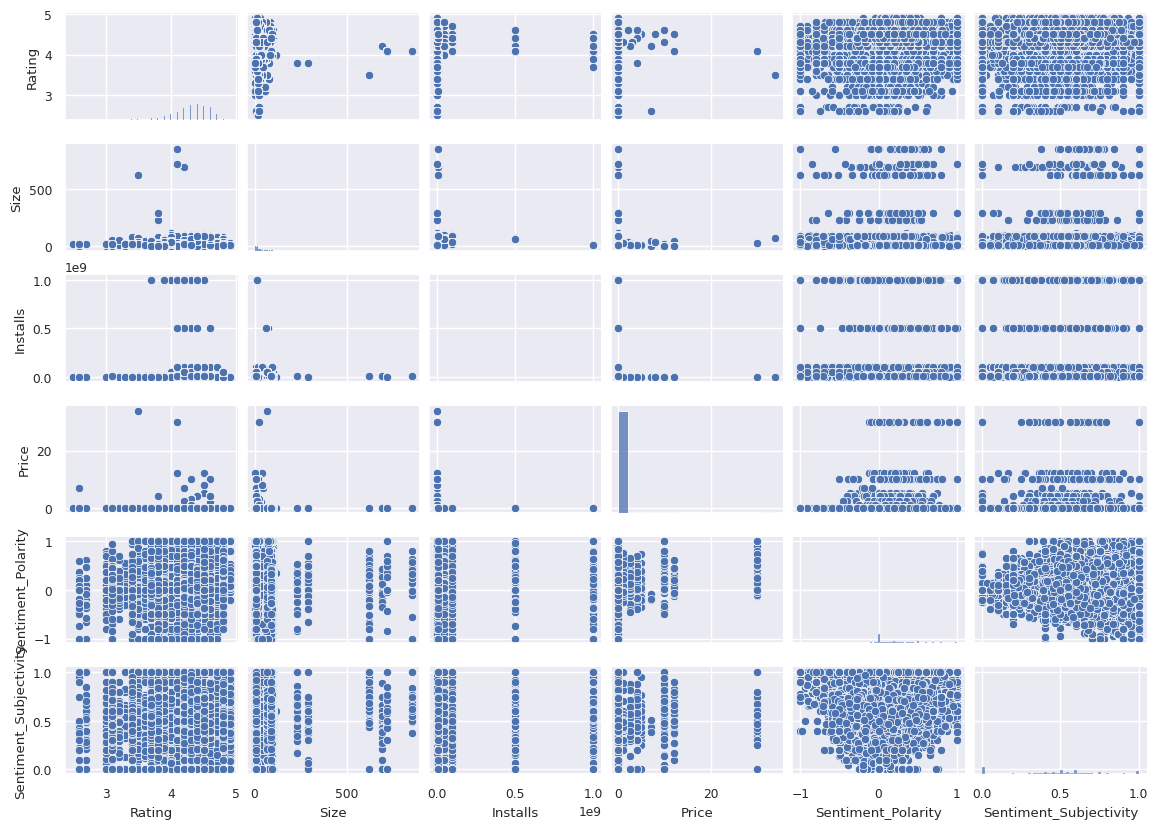

In [ ]:
# Set scale
sns.set(font_scale=0.8)

# Creating pairplot with a single color
sns.pairplot(merged_df, height=1.4, aspect=1.4)

# Reset font scale to default
sns.set(font_scale=1)

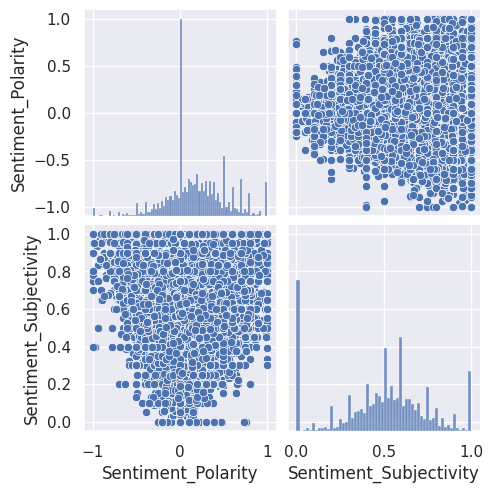

In [ ]:
# Pair Plot 
sns.pairplot(user_reviews)

Sentiment polarity refers to the sentiment expressed in a piece of text, whether it is a positive, negative or neutral. It is a way to measure the overall emotional tone or attitude conveyed by the text. 

1.   Positive: Text that expresses a positive sentiment or conveys a favorable opinion or emotion.
2.   Negative: Text that expresses a negative sentiment or conveys a critical or unfavorable opinion or emotion.
3.   Neutral: Text that does not convey a strong positive or a negative sentiment and is considered neutral or objective.




Sentiment subjectivity refers to the degree to which a statement or text expresses a subjective opinion or personal judgment rather than objective facts. It represents the extent to which the sentiment expressed in the text is influenced by personal beliefs, emotions, or perspectives.


1.   Subjective: A subjective statement expresses personal opinions, emotions, evaluations, or judgments. It reflects the speaker or writer's feelings, biases, or experiences and may not be universally agreed upon. Examples of subjective statements include expressing preferences, emotions, or evaluating the quality of something.

2.   Objective: An objective statement is based on factual information and does not include personal opinions or biases. It presents information or states verifiable facts without any emotional or evaluative elements. Objective statements are typically neutral and can be agreed upon universally.




*   We can see there are many outliers in Sentiment polarity and Sentiment subjectivity.
*   We can observe that from rating 3 to 5, there are many Sentiment polarity and Sentiment subjectivity points.


*   Free apps has higher number of ratings and installs.

*   Lesser app size has higher number of ratings.



